# Trabalho Prático de Introdução a Ciência dos Dados


### Integrantes:
- Bruno Henrique Evangelista Pereira
- Francisco Teixeira Rocha Aragão
- Lorenzo Carneiro Magalhaes
- Tomas Lacerda Muniz
- Victor de Almeida Nunes Murta

##### Para mais informações, checar [README.MD](README.md)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from deep_translator import GoogleTranslator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Vamos importar um dataset de tweets sobre o chatgpt, que pode ser encontrado em: [chatGPT-1000-daily-tweets](https://www.kaggle.com/datasets/edomingo/chatgpt-1000-daily-tweets)


In [2]:
df = pd.read_csv('data/chatgpt_daily_tweets.csv')

In [3]:
df.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,👷🏼 ♡ #GOT7,BPawarisa1a,ในใจJacksonwang,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,NaN,13640.0,0.0,0.0,0.0
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,ミミズクりんゆ,DRVO_Project,東京←岐阜,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,NaN,0.0,0.0,0.0,290.0
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,NaN,628.0,0.0,0.0,0.0
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,NaN,0.0,0.0,0.0,58.0
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,NaN,0.0,0.0,0.0,0.0


A partir das primeiras linhas do dataframe é possível perceber que ele possui uma grande variedade de informações sobre cada tweet, mas a maioria não será utilizada em nossa análise. Então, vamos começar filtrando as informações relevantes

In [4]:
atributos_drop = ['tweet_extracted', 'tweet_id', 'user_description', 'user_created', 'user_followers_count', 'user_following_count', 
                     'source', 'user_tweet_count', 'user_verified', 'user_id', 'user_name', 'user_username']
df = df.drop(columns=atributos_drop)
df.head()

,tweet_created,text,lang,user_location,retweet_count,like_count,reply_count,impression_count
0,2023-04-03 13:59:44+00:00,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,ในใจJacksonwang,13640.0,0.0,0.0,0.0
1,2023-04-03 10:59:22+00:00,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,東京←岐阜,0.0,0.0,0.0,290.0
2,2023-04-03 03:59:28+00:00,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,India,628.0,0.0,0.0,0.0
3,2023-04-03 15:59:59+00:00,Get an intelligent chatbot for your website in...,en,United Kingdom,0.0,0.0,0.0,58.0
4,2023-04-03 01:59:25+00:00,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,"Chicago, IL",0.0,0.0,0.0,0.0


In [5]:
df.describe()


,retweet_count,like_count,reply_count,impression_count
count,42994.000000,42994.000000,42994.000000,4.299400e+04
mean,1336.146881,3.014002,0.324348,4.916387e+02
std,4047.967653,81.795836,10.304805,1.341650e+04
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00
50%,28.000000,0.000000,0.000000,0.000000e+00
75%,788.000000,0.000000,0.000000,1.600000e+01
max,42548.000000,9170.000000,2009.000000,1.220101e+06


Agora que o dataframe já está limpo, é necessário filtrar os tweets relevantes. Para isso, vamos retirar todos os tweets que não possuem curtidas


In [6]:
print('Tamanho original:', len(df))
df_relevante = df.query('like_count > 0')
print('Tamanho após filtragem:', len(df_relevante))

Tamanho original: 66375
Tamanho após filtragem: 6824


Note como a quantidade de tweets diminuiu em quase 10 vezes. Isso se deve ao fato de que boa parte dos tweets são criados por bots, que pretendemos ignorar

Uma informação que é de grande utilidade é o intervalo de datas que o dataset abrange. Vamos conferir quais são as datas do primeiro e do último tweet:

In [7]:
df_new = df_relevante.sort_values('tweet_created')
print(df_new.iloc[0]['tweet_created'])
print(df_new.iloc[-1]['tweet_created'])

2023-04-03 00:59:40+00:00
2023-05-12 23:59:54+00:00


Também é interessante tentar entender como se comportam as curtidas no nosso conjunto de tweets

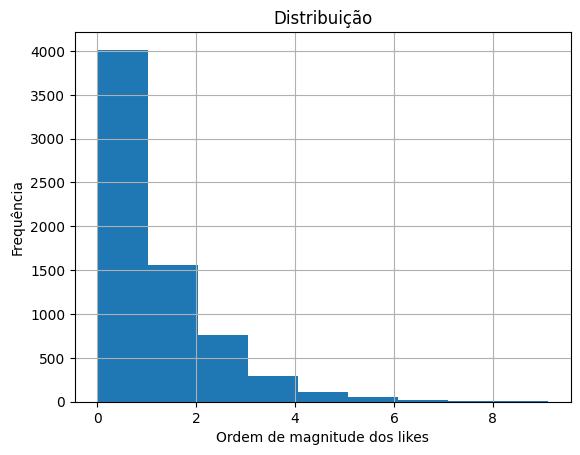

In [8]:
df_relevante_copy = df_relevante.copy()
df_relevante_copy['like_count_log'] = np.log(df_relevante_copy['like_count'])

df_relevante_copy['like_count_log'].hist(bins=9, alpha=1)
plt.title('Distribuição')
plt.xlabel('Ordem de magnitude dos likes')
plt.ylabel('Frequência')
plt.show()

Agora, vamos entender qual é a distribuição das linguas dos tweets no dataframe filtrado

In [9]:
# ordena as quantidades e tira as linguas com menos de 50 tweets
df_linguas = df_relevante.groupby('lang').count()[['text']].reset_index().rename(columns={'text': 'quantidade'})
df_linguas = df_linguas.sort_values('quantidade', ascending = True)
df_linguas = df_linguas.query('quantidade >= 50')

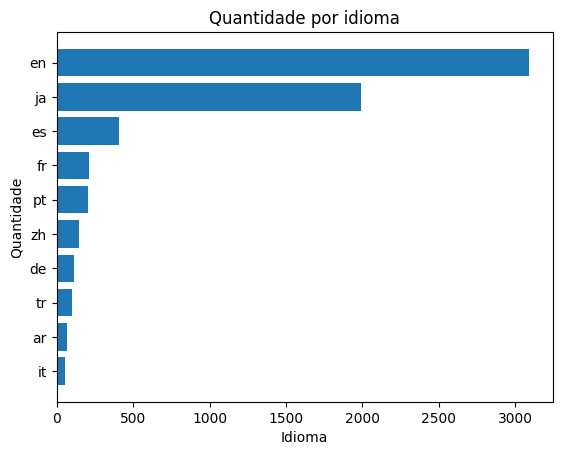

In [10]:
plt.barh(df_linguas['lang'], df_linguas['quantidade'])
plt.xlabel('Idioma')
plt.ylabel('Quantidade')
plt.title('Quantidade por idioma')
plt.show()

No nosso trabalho pretendemos utilizar um algoritmo para medir a emoção associada a cada tweet sobre o chatGPT. Entretanto, o algoritmo utilizado não é capaz de fazer essa análise para linguas diferentes do inglês, então é necessário traduzir todos os tweets para o inglês antes de fazer a análise

Vamos utilizar apenas os 100 primeiros tweets já que a tradução utiliza uma api do google, então traduzir todas as linhas leva muito tempo

In [11]:
def traduzir(tweet):
    return GoogleTranslator(source='auto', target='en').translate(tweet)

In [12]:
df_100 = df_relevante[0:100].copy()
df_100['traduzido'] = df_100['text'].apply(traduzir)
df_100.head()

,tweet_created,text,lang,user_location,retweet_count,like_count,reply_count,impression_count,traduzido
7,2023-04-03 20:59:31+00:00,#japan #ai #openai #chatgpt #wordoftheday \n教え...,ja,"Geneva, Switzerland",0.0,2.0,0.0,16.0,#japan #ai #openai #chatgpt #wordoftheday\ntel...
8,2023-04-03 17:59:40+00:00,Hvorfor vil #ChatGPT spøke med Joe Biden men i...,no,"Oslo, Norge",4.0,75.0,8.0,17721.0,Why will #ChatGPT joke with Joe Biden but not ...
9,2023-04-03 12:59:26+00:00,The plagiarism detector will introduce its #AI...,en,"New Hampshire, USA",7.0,22.0,1.0,5769.0,The plagiarism detector will introduce its #AI...
24,2023-04-03 01:59:26+00:00,My first reminder that GPT4 (which is astonish...,en,NaN,1.0,9.0,1.0,2710.0,My first reminder that GPT4 (which is astonish...
25,2023-04-03 05:59:40+00:00,ChatGPTガンガン使って、トップスピードで失敗踏んで、誰よりも早く立ち直りなさい。本学の...,ja,NaN,0.0,1.0,0.0,68.0,"Use ChatGPT pounding, step on failure at top s..."


Agora que temos uma coluna traduzida, podemos criar colunas para as análises de sentimento (negativo, positivo e neutro)

In [13]:
from src.classification.vaderFunctions import classify

# 1 for positive
# 0 for neutral
# -1 for negative

df_100['sentimental_label'] = df_100['traduzido'].apply(classify)
df_100.head()

,tweet_created,text,lang,user_location,retweet_count,like_count,reply_count,impression_count,traduzido,sentimental_label
7,2023-04-03 20:59:31+00:00,#japan #ai #openai #chatgpt #wordoftheday \n教え...,ja,"Geneva, Switzerland",0.0,2.0,0.0,16.0,#japan #ai #openai #chatgpt #wordoftheday\ntel...,0
8,2023-04-03 17:59:40+00:00,Hvorfor vil #ChatGPT spøke med Joe Biden men i...,no,"Oslo, Norge",4.0,75.0,8.0,17721.0,Why will #ChatGPT joke with Joe Biden but not ...,1
9,2023-04-03 12:59:26+00:00,The plagiarism detector will introduce its #AI...,en,"New Hampshire, USA",7.0,22.0,1.0,5769.0,The plagiarism detector will introduce its #AI...,1
24,2023-04-03 01:59:26+00:00,My first reminder that GPT4 (which is astonish...,en,NaN,1.0,9.0,1.0,2710.0,My first reminder that GPT4 (which is astonish...,1
25,2023-04-03 05:59:40+00:00,ChatGPTガンガン使って、トップスピードで失敗踏んで、誰よりも早く立ち直りなさい。本学の...,ja,NaN,0.0,1.0,0.0,68.0,"Use ChatGPT pounding, step on failure at top s...",1


Esses sentimentos serão explorados na versão final do projeto. O foco é entender as variações dos sentimentos em relação ao chatGPT à medida que notícias relacionadas à tecnologia eram distribuidas.

Para mais uma amostra da análise de sentimento, realizamos um teste com uma amostra gerada e classificada manualmente para verificarmos a acurácia do modelo.

------------------------------
Model accuracy: 0.73
------------------------------


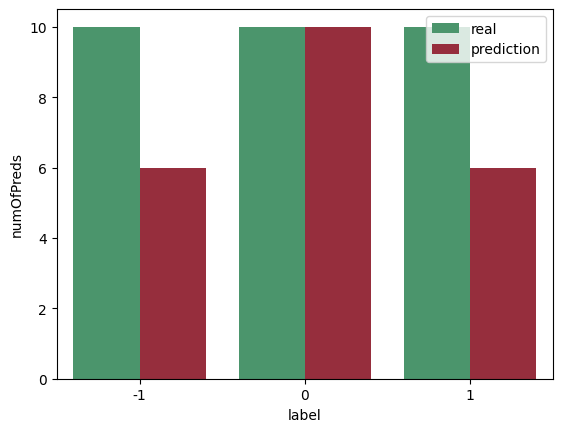

In [15]:
from src.classification.sampleVader import vader_sample_test

vader_sample_test()